## **Linear Regression**

Linear Regression is a statistical approach to modeling the linear relationship between predictor variables and the target variable.

These variables are known as the independent and dependent variables, respectively. 


When there is one independent variable, it is known as **simple linear regression**. When there are more independent variables, it is called **multiple linear regression**.

**Simple Linear Regression**:   $\hat y = \beta_0+\beta_1x+\epsilon$


**Multiple Linear Regression**: $\hat y = \beta_0+\beta_1x_1+\dots \beta_px_p+\epsilon$ where $p$ is... number of features in the model



Linear regression serves two primary functions: understanding variable relationships and forecasting:
 
* The coefficients represent the estimated magnitude and direction (positive/negative) of each independent variable's relationship with the dependent variable.
*  A linear regression equation predicts the mean value of the dependent variable given the values of the independent variables. So, it enables us to forecast.
 

# Simple Linear Regression

# Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import data

In [2]:
# Get dataset
df = pd.read_csv('Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Analyze data

In [4]:
df.shape

(30, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [7]:
# Describe data
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Distribution

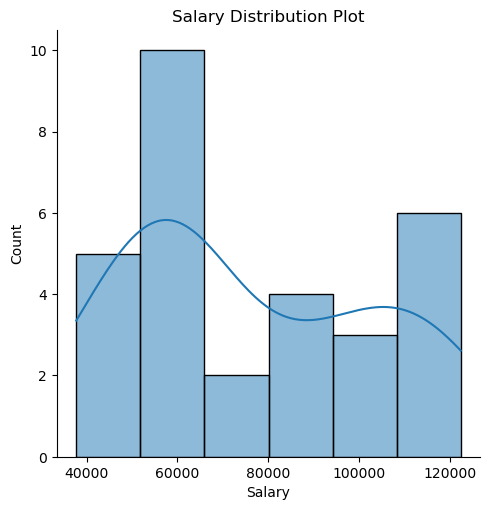

In [8]:
# Data distribution using displot
sns.displot(df['Salary'], kde=True)
plt.title('Salary Distribution Plot')
plt.show()

The graph represents how salaries are distributed within the dataset, highlighting the most common salary ranges and the overall distribution pattern.

## Relationship between Salary and Experience

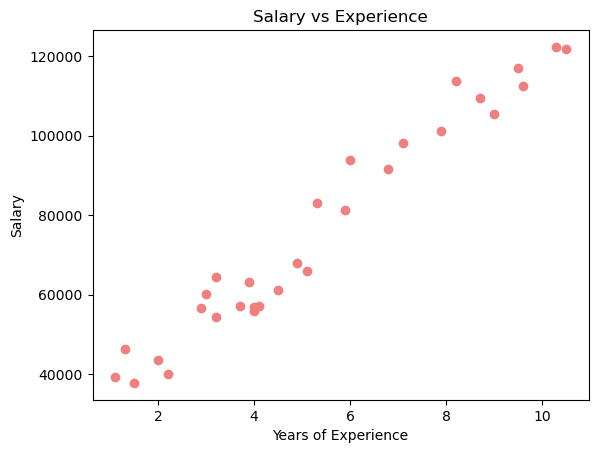

In [9]:
# Relationship between Salary and Experience
plt.scatter(df['YearsExperience'], df['Salary'], color = 'lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Correlation

In [10]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#### Interpretation:
**Diagonal Values (1.000000):** The diagonal values are always 1 because a variable is perfectly correlated with itself.

**Off-Diagonal Values (0.978242):** The off-diagonal values represent the correlation between YearsExperience and Salary. In this case, the correlation coefficient is 0.978242, which indicates a very strong positive correlation between the two variables.

**What This Tells Us:**
Strong Positive Correlation: A correlation coefficient of 0.978242 suggests that as YearsExperience increases, Salary also tends to increase. This strong positive relationship indicates that YearsExperience is a good predictor of Salary.

## Heatmap

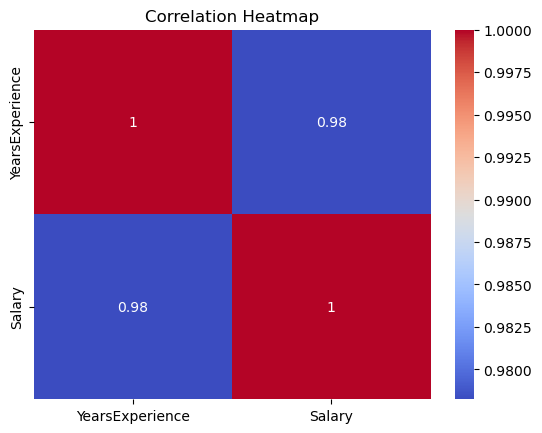

In [29]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Add titles and labels
plt.title('Correlation Heatmap')
plt.show()

# Split data

## Split into Independent/Dependent variables

In [11]:
# Splitting variables
X = df[['YearsExperience']]  # independent variable
y = df['Salary']  # dependent variable

Use double brackets to ensure that X is a DataFrame. This is important because machine learning models expect the input features to be in a 2-dimensional format. Using a single bracket returns a pandas Series.

## Split into Train/Test sets

In [12]:
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
 y_train

In [ ]:
y_test

# Train model

In [13]:
# Regressor model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Predict results

In [14]:
# Prediction result
y_pred_test = model.predict(X_test)     # predicted value of y_test
y_pred_train = model.predict(X_train)   # predicted value of y_train

In [15]:
y_pred_test

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [16]:
y_test

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
Name: Salary, dtype: float64

# Visualize predictions

## Prediction on training set

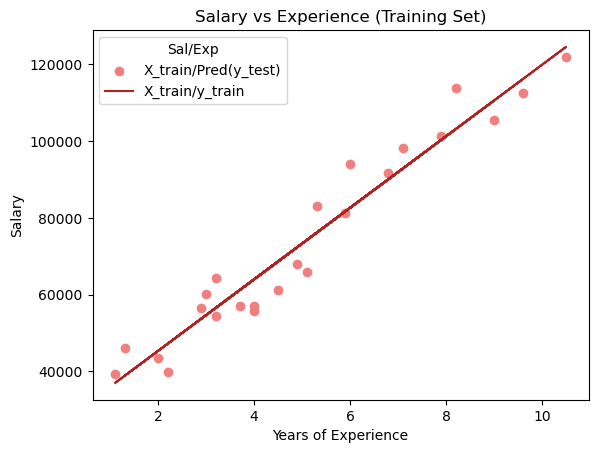

In [22]:
# Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.show()

## Prediction on test set

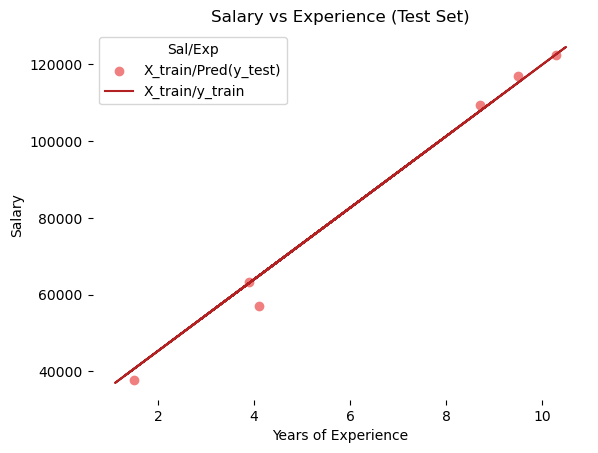

In [23]:
# Prediction on test set
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

# Coefficient and Intercept

In [24]:
# Regressor coefficients and intercept
print(f'Coefficient: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Coefficient: [9312.57512673]
Intercept: 26780.099150628186


## MSE, RMSE and R²

In [27]:
# Calculate Mean Squared Error (MSE) 
mse = mean_squared_error(y_test, y_pred_test) 
print("Mean Squared Error (MSE):", mse) 

# Calculate Root Mean Squared Error (RMSE) 
rmse = np.sqrt(mse) 
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R² (R square)
r2 = r2_score(y_test, y_pred_test)
print("R² Score:", r2)

Mean Squared Error (MSE): 12823412.298126562
Root Mean Squared Error (RMSE): 3580.979237321345
R² Score: 0.988169515729126


The R² score indicates the proportion of the variance in the dependent variable (Salary) that is predictable from the independent variable (YearsExperience). An R² score of 0.988169515729126 means that approximately 98.82% of the variance in Salary can be explained by YearsExperience. This is a very high value, indicating an excellent fit of the model to the data.

**Good Fit:** The high R² score suggests that the model explains most of the variability in the dependent variable, making it a good fit for the data.

## Predictions:

In [26]:
# New data for prediction (e.g., new years of experience) 
new_data = pd.DataFrame({'YearsExperience': [5, 10, 15]}) 
# Predict future values 
predictions = model.predict(new_data) 
# Output the predictions 
print("Predicted Salary:", predictions)

Predicted Salary: [ 73342.97478427 119905.85041792 166468.72605157]
